In [19]:
import numpy as np
import pandas as pd
from PIL import Image
import shutil
import os
import time
import copy
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [2]:
sign_names = pd.read_csv('signnames.csv')

In [3]:
sign_names

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [4]:
base_dir = './traffic-sign/'
train_data = pd.read_csv(base_dir+'Train.csv')
print("Len of train data", len(train_data))
test_data = pd.read_csv(base_dir+'Test.csv')
print("Len of Test data", len(test_data))

Len of train data 39209
Len of Test data 12630


In [6]:
np.random.seed(42)
sub_class_df = pd.DataFrame(columns = train_data.columns)
sub_classes = [8, 9, 14, 26, 27, 33, 34, 36, 37]
print(len(sub_classes))
for i in sub_classes:
    sub_class_data = train_data[train_data['ClassId']==i]
    sub_class_data = sub_class_data.sample(n = 200)
    #print(sub_train_data.head())
    sub_class_df = pd.concat([sub_class_df, sub_class_data], ignore_index=True)

9


In [7]:
src = base_dir
trg = base_dir+'subclass/'
files= list(sub_class_df['Path'].values)
#iterating over all the files in the source directory
for fname in files:
    class_id  = fname.rsplit("/", 2)[1]
    # copying the files to the
    # destination directory
    isExist = os.path.exists(trg+class_id+"/")
    if not isExist:
       # Create a new directory because it does not exist
       os.makedirs(trg+class_id+"/")
    shutil.copy2(os.path.join(src,fname), trg+class_id+"/")

In [8]:
sub_class_df.head(4)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,58,57,6,5,53,52,8,Train/8/00008_00011_00023.png
1,50,42,6,6,44,37,8,Train/8/00008_00028_00024.png
2,44,44,5,6,39,39,8,Train/8/00008_00043_00021.png
3,35,34,6,5,30,29,8,Train/8/00008_00006_00012.png


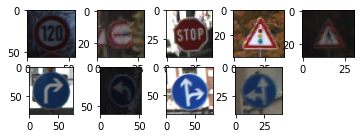

In [27]:
np.random.seed(42)
images = []
for j in sub_classes:
    sub_class_data = train_data[train_data['ClassId']==j]
    sub_class_data = sub_class_data.sample(n = 1)
    #path = sub_class_data['Path'][j]
    img = np.array(Image.open(base_dir + sub_class_data['Path'].iloc[0]))
    images.append(img)
fig = plt.figure() # create a new figure window
for i in range(len(sub_classes)): # display 20 images
    # subplot : 4 rows and 5 columns

    img_grid = fig.add_subplot(4, 5, i+1)
    # plot features as image
    img_grid.imshow(images[i])

plt.show()

In [9]:
images = []

In [10]:
for i in range(len(sub_class_df)):
    img = Image.open(base_dir + sub_class_df['Path'][i])
    img = img.resize((32, 32), Image.ANTIALIAS)
    img = np.array(img)
    #print(img.shape)
    img = rgb2gray(img)
    img = img.flatten()
    images.append(img)
    
    

In [11]:
images = np.array(images)
images.shape

(1800, 1024)

In [12]:

X = images
y = sub_class_df['ClassId']
y =[(sign_names[sign_names['ClassId']== e]['SignName'].values)[0] for e in y]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, shuffle=True,random_state=42)

In [14]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [15]:
y_pred = sgd_clf.predict(X_test)

In [16]:
100*np.sum(y_pred == y_test)/len(y_test)

94.16666666666667

In [17]:
# X = images
# y = sub_class_df['ClassId']
# X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, shuffle=True,random_state=42)

svm_clf = svm.SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)

svm_clf.score(X_test, y_test)

0.9083333333333333

In [18]:
# sub_test = pd.DataFrame(columns = list(test_data.columns))
# for i in sub_classes:
#     sub_test = pd.concat([sub_test, test_data[test_data['ClassId']==i]], ignore_index=True)
# predictions = []
# for i in range(1200, 1220):
#     img = Image.open(base_dir+sub_test['Path'][i])
#     img = img.resize((32, 32), Image.ANTIALIAS)
#     img = np.array(img)
#     #print(img.shape)
#     img = rgb2gray(img)
#     img = img.flatten()
#     pred = sgd_clf.predict([img])
#     print("Actual- ",  sub_test['ClassId'][i], " Predicted- ", pred)
    
    
